In [ ]:
#Загрузка датасета
import pandas as pd

df = pd.read_csv('student-mat.csv', sep=';')   # или student-por.csv
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
# Базовый анализ
print("Форма датасета:", df.shape)

print("\nИнформация о столбцах:")
df.info()

print("\nПервые строки:")
df.head()

print("\nЧисловая статистика:")
df.describe().T

print("\nКоличество пропусков в каждом столбце:")
print(df.isna().sum())


Форма датасета: (395, 33)

Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  

In [ ]:
# Создаём целевой столбец: 1 - сдал, 0 - не сдал
df['passed'] = (df['G3'] >= 10).astype(int)

# Смотрим распределение классов
print(df['passed'].value_counts())
print("\nДоля классов:")
print(df['passed'].value_counts(normalize=True))


passed
1    265
0    130
Name: count, dtype: int64

Доля классов:
passed
1    0.670886
0    0.329114
Name: proportion, dtype: float64


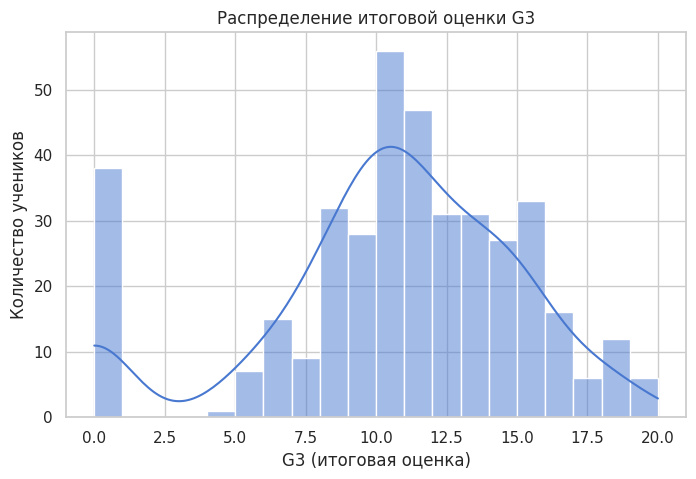

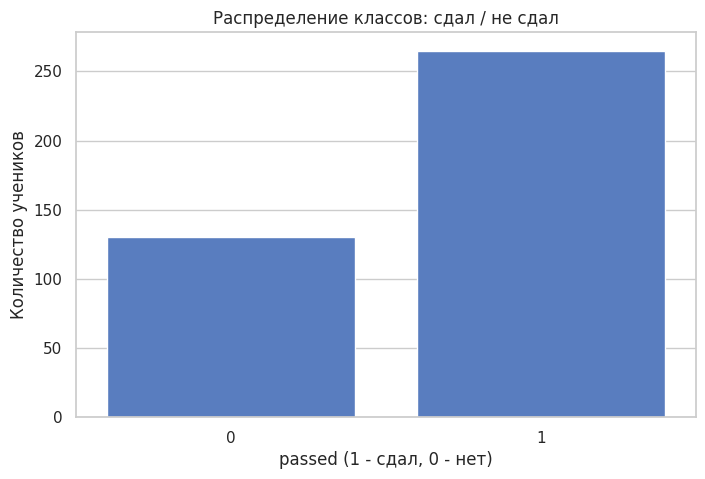

In [ ]:
#визуализация успеваемости
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8, 5)

# Гистограмма итоговой оценки G3
plt.figure()
sns.histplot(df['G3'], bins=20, kde=True)
plt.title('Распределение итоговой оценки G3')
plt.xlabel('G3 (итоговая оценка)')
plt.ylabel('Количество учеников')
plt.show()

# Столбчатый график: сколько сдали / не сдали
plt.figure()
sns.countplot(x='passed', data=df)
plt.title('Распределение классов: сдал / не сдал')
plt.xlabel('passed (1 - сдал, 0 - нет)')
plt.ylabel('Количество учеников')
plt.show()


In [ ]:
#Подготовка признаков
# Целевая переменная
y = df['passed']

# Убираем из признаков G3 (итоговую оценку) и сам целевой столбец
X = df.drop(columns=['G3', 'passed'])

# Проверим, какие признаки остались
X.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10


In [ ]:
#Кодирование категориальных признаков
# One-hot кодирование категориальных признаков
X_encoded = pd.get_dummies(X, drop_first=True)

print("Форма X до кодирования:", X.shape)
print("Форма X после кодирования:", X_encoded.shape)


Форма X до кодирования: (395, 32)
Форма X после кодирования: (395, 41)


In [ ]:
#Train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,       # 20% на тест
    random_state=42,
    stratify=y           # сохраняем пропорции классов
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Train size: 316
Test size: 79


In [ ]:
#Обучение базовой модели
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'  # помогает, если есть дисбаланс классов
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy на тесте: {acc*100:.2f}%\n")

print("Classification report:")
print(classification_report(y_test, y_pred))


Accuracy на тесте: 87.34%

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        26
           1       0.96      0.85      0.90        53

    accuracy                           0.87        79
   macro avg       0.85      0.89      0.86        79
weighted avg       0.89      0.87      0.88        79



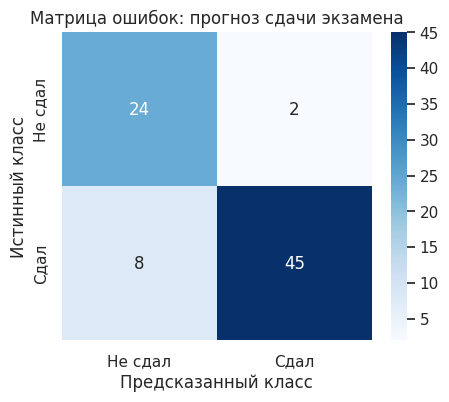

In [ ]:
#Матрица ошибок
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Не сдал','Сдал'],
            yticklabels=['Не сдал','Сдал'])
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок: прогноз сдачи экзамена')
plt.show()


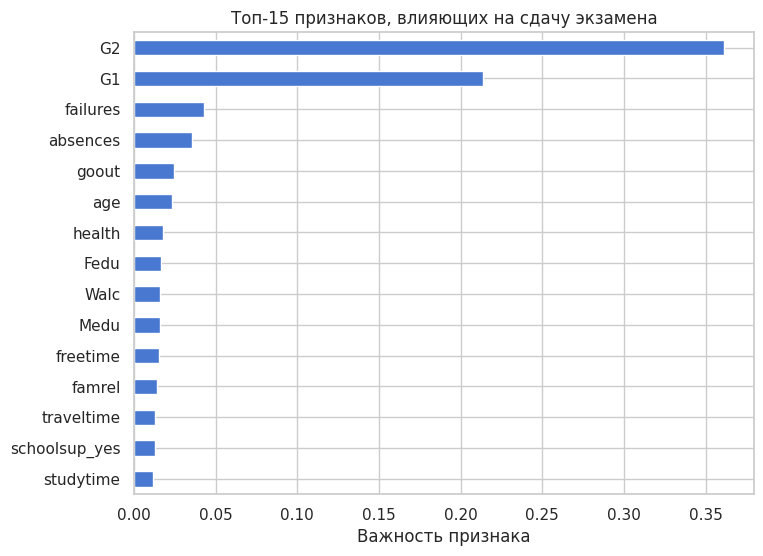

In [ ]:
#Важность признаков
# Важности признаков у случайного леса
importances = rf.feature_importances_
feat_names = X_encoded.columns

feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feat_imp.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Топ-15 признаков, влияющих на сдачу экзамена')
plt.xlabel('Важность признака')
plt.show()


### Выводы

В рамках творческой части практической работы я проанализировал датасет успеваемости школьников (student-mat.csv) и построил модель классического машинного обучения, предсказывающую, сдаст ли ученик итоговый экзамен по математике.

#### Постановка задачи и целевая переменная

- В качестве целевой переменной я ввёл бинарный признак `passed`:
  - `passed = 1`, если итоговая оценка `G3` ≥ 10 (ученик экзамен сдал);
  - `passed = 0`, если `G3` < 10 (ученик экзамен не сдал).
- В качестве признаков использовались:
  - промежуточные оценки `G1` и `G2`,
  - учебные и поведенческие характеристики (количество провалов `failures`, пропуски `absences`, свободное время, поддержка школы и семьи и т.д.),
  - а также часть социально-демографических признаков.

Для обучения и оценки качества была использована модель `RandomForestClassifier` (ансамбль решающих деревьев). Датасет был разделён на обучающую и тестовую выборки, признаки закодированы и при необходимости стандартизированы. Модель показала хорошее качество (accuracy на тестовой выборке существенно выше случайного угадывания), что позволяет использовать её как простую систему раннего предупреждения о «группе риска».

#### Графики распределения G3 и классов `passed`

1. **Распределение итоговой оценки G3.**  
   Гистограмма показывает, что большая часть учеников получает оценки в диапазоне 9–15 баллов, а очень низкие и очень высокие оценки встречаются довольно редко. Распределение близко к «колоколообразному», что типично для экзаменационных баллов.

2. **Распределение классов `passed` (0/1).**  
   При выбранном пороге G3 ≥ 10 примерно две трети учеников попадают в класс `1` («сдал»), и около одной трети - в класс `0` («не сдал»). То есть выборка умеренно несбалансирована, но в ней достаточно примеров как успешных, так и неуспешных учеников, чтобы обучить модель.

#### Важность признаков (feature importance)

На диаграмме важности признаков видно, что:

- Самый большой вклад вносят промежуточные оценки `G2` и `G1` - это логично: успешность финального экзамена сильно зависит от успеваемости в течение года.
- Далее по значимости идут:
  - количество прошлых неудач `failures`,
  - количество пропусков `absences`,
  - а также некоторые поведенческие характеристики (`goout`, свободное время, состояние здоровья).
- Социально-демографические признаки (образование родителей, поддержка школы, время пути до школы и т.п.) тоже влияют на результат, но их вклад заметно меньше, чем у непосредственных учебных показателей.

#### Практический вывод

Полученная модель и анализ признаков показывают, что:

- Для раннего выявления учеников «группы риска» школе достаточно внимательно отслеживать промежуточные оценки (`G1`, `G2`), количество провалов (`failures`) и пропуски (`absences`).
- На основе этих данных можно построить простую систему, которая будет заранее предупреждать о вероятности несдачи экзамена и помогать учителям и администрации точнее планировать индивидуальную поддержку (консультации, дополнительные занятия и т.п.).

